In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os,sys

In [37]:
logfolder =  "/home/ubuntu/git/distracteddriver/logs"
parse_script_path = "/home/ubuntu/caffe2/caffe/tools/extra/parse_log.py"
log_file = '/home/ubuntu/git/distracteddriver/logs/caffenet_learnall_0.log'

In [68]:
# presently i am unable to execute this command from the ipython notebook and hence need to do it manually
#!python {parse_script_path} {log_file} {logfolder} --verbose

In [94]:
#python /home/ubuntu/caffe2/caffe/tools/extra/parse_log.py logs/caffenet2_mirror_0.log logs/ --delimiter ','
#caffe train -solver solvers/solver_caffenet.prototxt -weights weights/bvlc_reference_caffenet.caffemodel 2>&1 | tee logs/caffenet2_mirror_0.log

## Plotting function

In [89]:
def plot_log(log_file, title=None):
    #!$parse_script_path $logpath $logfolder
    train_log_file = log_file + '.train'
    test_log_file = log_file + '.test'
    df_train = pd.read_table(train_log_file, sep = ',')
    df_test = pd.read_table(test_log_file, sep = ',')
    
    print 'Total Time:', df_train.Seconds.iloc[-1], 'seconds'
    print 'CV loss:', df_test.loss.iloc[-1], 'CV accuracy:', df_test.accuracy.iloc[-1]
    
    plt.figure()
    plt.plot(df_train['NumIters'],df_train['loss'] , label = 'Train Loss')
    plt.plot(df_test['NumIters'],df_test['loss'] , label = 'CV Loss')
    plt.plot(df_test['NumIters'],df_test['accuracy'] , label = 'CV Accuracy')
    plt.grid()
    plt.legend()
    plt.title(log_file)
    plt.xlabel('num_iters')
    plt.ylabel('loss')
    plt.show()

## Plotting googlenet

In [9]:
#df_train.columns

Index([u'NumIters', u'Seconds', u'LearningRate', u'loss1/loss1',
       u'loss2/loss1', u'loss3/loss3'],
      dtype='object')

In [10]:
#df_test.columns

Index([u'NumIters', u'Seconds', u'LearningRate', u'loss1/loss1',
       u'loss1/top-1', u'loss1/top-5', u'loss2/loss1', u'loss2/top-1',
       u'loss2/top-5', u'loss3/loss3', u'loss3/top-1', u'loss3/top-5'],
      dtype='object')

In [11]:
def plot_log_googlenet(log_file, title=None):    
    train_log_file = log_file + '.train'
    test_log_file = log_file + '.test'
    df_train = pd.read_table(train_log_file, sep = ',')
    df_test = pd.read_table(test_log_file, sep = ',')
    
    print 'Total Time:', df_train.Seconds.iloc[-1], 'seconds'
    print 'CV loss:', df_test['loss3/loss3'].iloc[-1], 'CV accuracy:', df_test['loss3/top-1'].iloc[-1]
    
    plt.figure()
    plt.plot(df_train['NumIters'],df_train['loss3/loss3'] , label = 'Train Loss')
    plt.plot(df_test['NumIters'],df_test['loss3/loss3'] , label = 'CV Loss')
    plt.plot(df_test['NumIters'],df_test['loss3/top-1'] , label = 'CV Accuracy')
    plt.grid()
    plt.legend()
    plt.title(log_file)
    plt.xlabel('num_iters')
    plt.ylabel('loss')
    plt.show()

## Caffenet

### caffenet1_0

* Train and CV sets are taken from all drivers by shuffling. 
* Trained only the last fully connected layers. 
* Starting weights were caffenet weights. 
* Notice that the CV loss is less than the Train loss. This can happen in situations when dropout is activated during the training phase and deactivated during the test. 
Ref: http://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error
* ** Train time** The train time for this model is comparatively high as a batch size of 256 was used. Changed this to 64 in subsequent trainings. **Note** : the training loss curves are smoother with the higher batch size. 

Total Time: 886.996666 seconds
CV loss: 0.685274 CV accuracy: 0.876


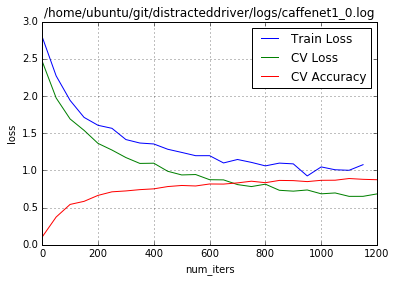

In [91]:
plot_log('/home/ubuntu/git/distracteddriver/logs/caffenet1_0.log')

### caffenet2_nomirror

* **No mirror** No mirroring was done during training. The expectation was that mirroring is not required as all photos are taken from the same position. It seems to deteriorate performance marginally. 
* ** Batch Size** The higher error may also be because of the lower batch size (64) compared to (256) in **caffenet1_0**
____
* Train and CV sets are taken from all drivers by shuffling. 
* Trained only the last fully connected layers. 
* Starting weights were caffenet weights. 
* Notice that the CV loss is less than the Train loss. This can happen in situations when dropout is activated during the training phase and deactivated during the test. 
Ref: http://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error

Total Time: 325.892607 seconds
CV loss: 0.780851 CV accuracy: 0.861333


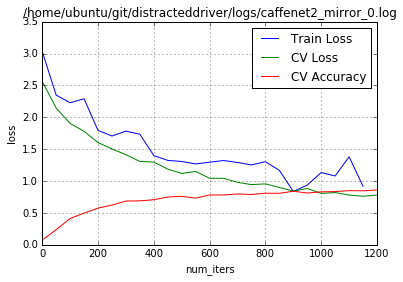

In [90]:
plot_log('/home/ubuntu/git/distracteddriver/logs/caffenet2_mirror_0.log')

### caffenet_learnall_0

* Trained all layers of the model
* **This result looked unreal. Suspected that using all drivers for training is causing CNN to learn un-desirable features. Confired suspicion via next test**
___
* Train and CV sets are taken from all drivers by shuffling. 
* Starting weights were caffenet weights. 

Total Time: 429.997908 seconds
CV loss: 0.0716736 CV accuracy: 0.982667


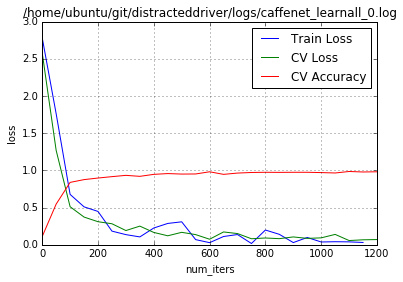

In [92]:
plot_log('/home/ubuntu/git/distracteddriver/logs/caffenet_learnall_0.log')

### caffenet_learnall2_0

* Trained all layers of the model
* Used 21 drivers for training and separate set of 5 drivers for CV. Notice the gap in train and CV error. 
** Does this mean that we should train only the last FC layer or perhaps augment data and run more number of iterations **
___
* Starting weights were caffenet weights. 

Total Time: 435.925601 seconds
CV loss: 1.21773 CV accuracy: 0.688


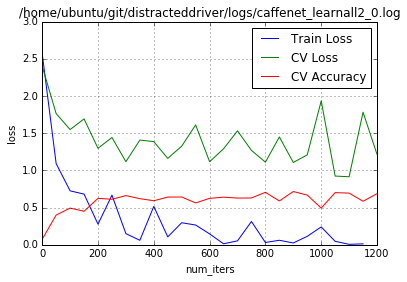

In [93]:
plot_log('/home/ubuntu/git/distracteddriver/logs/caffenet_learnall2_0.log')

## Googlenet

### googlenet10class

* Train and CV sets are taken from all drivers by shuffling. 
* Trained only 3 fully connected layers. 
* Starting weights were some weights from earlier training. 
 ____
* Will train this again without shuffled training data

Total Time: 435.261395 seconds
CV loss: 0.638198 CV accuracy: 0.833333


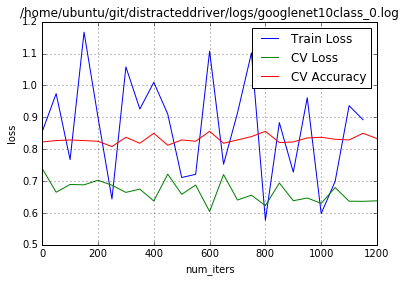

In [12]:
plot_log_googlenet('/home/ubuntu/git/distracteddriver/logs/googlenet10class_0.log')